In [1]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt
#import community
from networkx.algorithms.community import greedy_modularity_communities
#import community.community_louvain as cl
import pandas as pd
import scipy.stats as stats
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df_cora_sim = pd.read_csv('cora_cosine_weights.csv')

In [3]:
df_nodes=pd.read_csv('cora_labels.csv')

In [4]:
#scaler = MinMaxScaler(feature_range=(0, 1)) #
#df_cora['weight'] = scaler.fit_transform(df_cora[['weight']])#
#df_cora.head()

In [5]:
df_cora = df_cora_sim[['source','target','weight']]
df_cora['weight']= 1 - df_cora['weight']
#df_cora_sim['weight']= 1 / df_cora_sim['weight']
df_cora.head()

,source,target,weight
0,0,633,0.031586
1,0,1862,0.067911
2,0,2582,0.055311
3,1,2,0.107740
4,1,652,0.059181


In [6]:
cora_graph= nx.from_pandas_edgelist(df_cora, 'source', 'target', create_using=nx.DiGraph())

In [7]:
cora_graph.number_of_edges()

5278

In [8]:
GNN_dist= nx.from_pandas_edgelist(df_cora, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

In [9]:
GNN_sim= nx.from_pandas_edgelist(df_cora_sim, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

# Degree Centrality

## GNN_cora

In [10]:
# Calculate the weighted degree centrality
def weighted_out_degree(G):
  # Calcolo della weighted out-degree centrality
  out_degrees = dict(G.out_degree(weight='weight'))
  max_weight = max(out_degrees.values())
  weighted_out_degrees = {node: (degree / max_weight) for node, degree in out_degrees.items()}

  # Calcolo della somma delle weighted out-degree centralities
  total_weighted_out_degree = sum(weighted_out_degrees.values())

  # Normalizzazione della weighted out-degree centrality
  weighted_out_degree_centrality_normalized = {node: (degree / total_weighted_out_degree) for node, degree in weighted_out_degrees.items()}
  return dict(sorted(weighted_out_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))
# Print the result

def weighted_in_degree(G):
  in_degrees = dict(G.in_degree(weight='weight'))
  max_weight = max(in_degrees.values())
  weighted_in_degrees = {node: (degree / max_weight) for node, degree in in_degrees.items()}

  # Calcolo della somma delle weighted in-degree centralities
  total_weighted_in_degree = sum(weighted_in_degrees.values())

  # Normalizzazione della weighted in-degree centrality
  weighted_in_degree_centrality_normalized = {node: (degree / total_weighted_in_degree) for node, degree in weighted_in_degrees.items()}

  return dict(sorted(weighted_in_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))

In [11]:
GNN_dist_out_degree = weighted_out_degree(GNN_dist)
GNN_dist_in_degree = weighted_in_degree(GNN_dist)

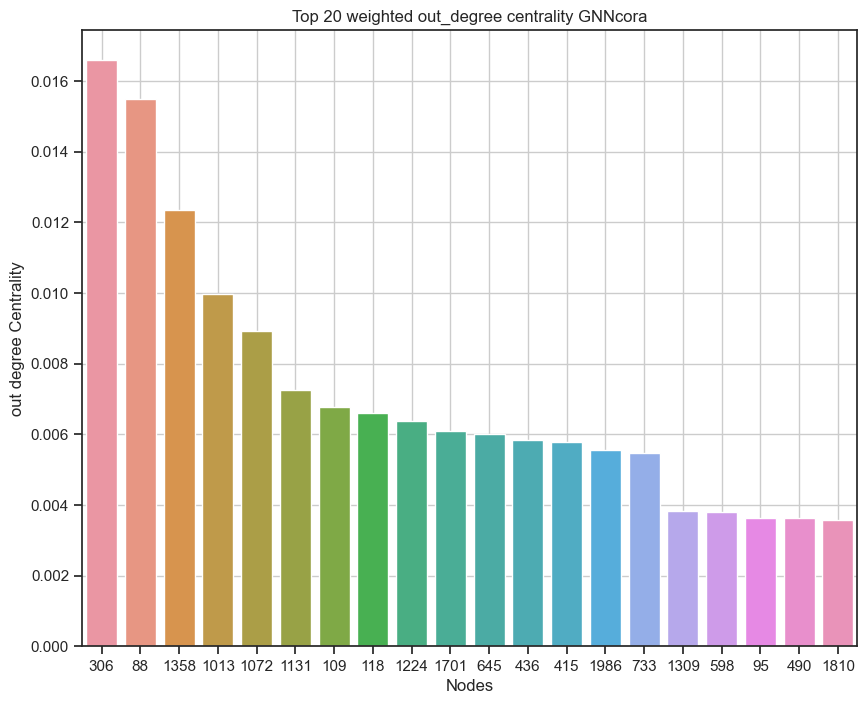

In [12]:
keys = list(map(str,list(GNN_dist_out_degree.keys())[:20]))
values = list(GNN_dist_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('out degree Centrality')
plt.title('Top 20 weighted out_degree centrality GNNcora')
plt.grid()
plt.show()

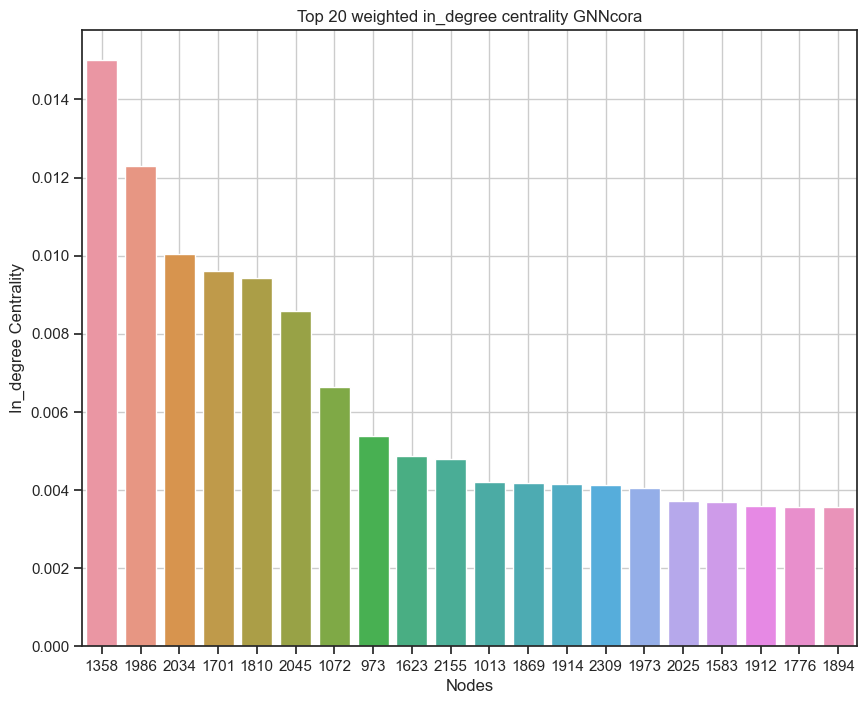

In [13]:
keys = list(map(str,list(GNN_dist_in_degree.keys())[:20]))
values = list(GNN_dist_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('In_degree Centrality')
plt.title('Top 20 weighted in_degree centrality GNNcora')
plt.grid()
plt.show()

## cora graph

In [14]:
cora_out_degree = weighted_out_degree(cora_graph)
cora_in_degree = weighted_in_degree(cora_graph)

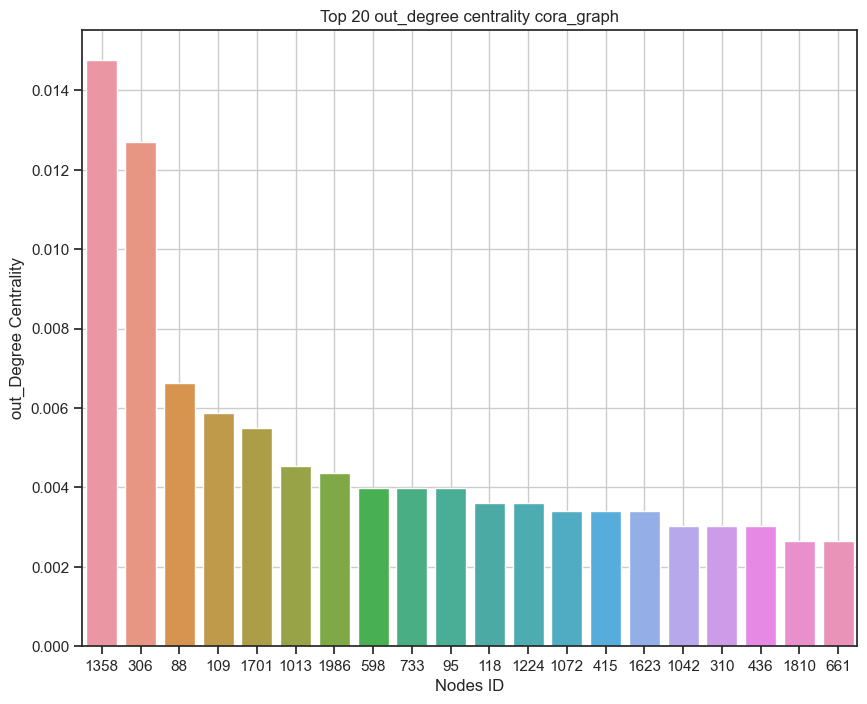

In [15]:

keys = list(map(str,list(cora_out_degree.keys())[:20]))
values = list(cora_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('out_Degree Centrality')
plt.title('Top 20 out_degree centrality cora_graph')
plt.grid()
plt.show()

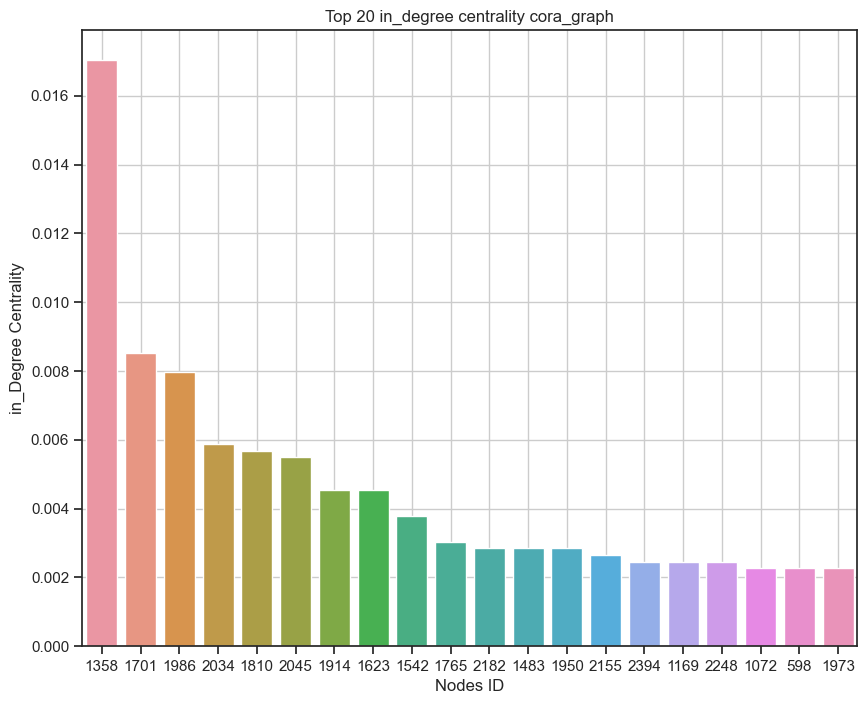

In [16]:
keys = list(map(str,list(cora_in_degree.keys())[:20]))
values = list(cora_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('in_Degree Centrality')
plt.title('Top 20 in_degree centrality cora_graph')
plt.grid()
plt.show()

# Betweeness centrality

## GNN_cora

In [17]:
#questa centralità interpreta i pesi come distanza
GNN_betweeness = nx.betweenness_centrality(GNN_dist, weight = 'weight')

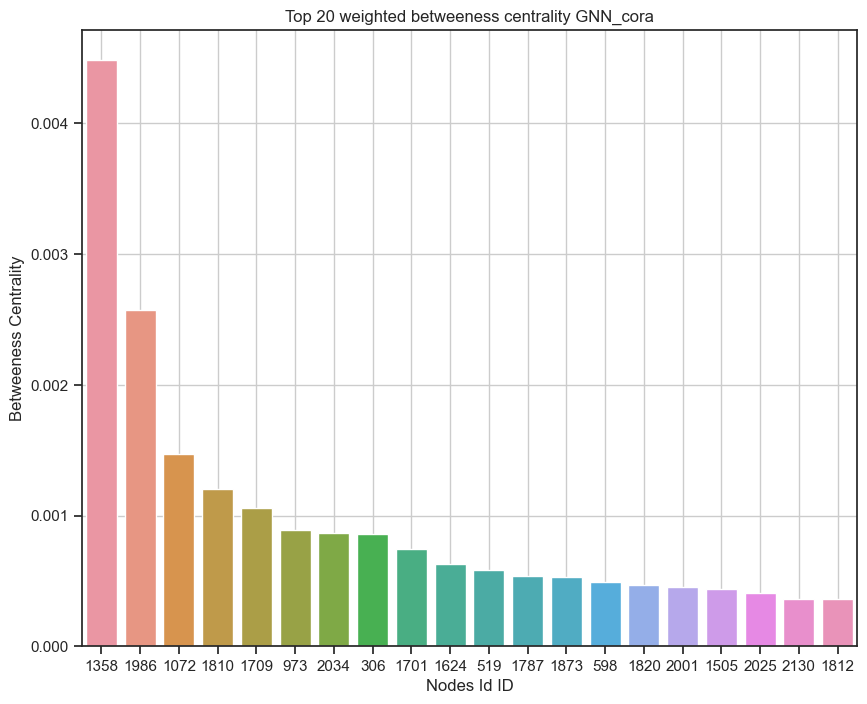

In [18]:
GNN_betweeness = dict(sorted(GNN_betweeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_betweeness.keys())[:20]))
values = list(GNN_betweeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes Id ID')
plt.ylabel('Betweeness Centrality')
plt.title('Top 20 weighted betweeness centrality GNN_cora')
plt.grid()
plt.show()

## cora graph

In [19]:
bet_cora_graph = nx.betweenness_centrality(cora_graph)

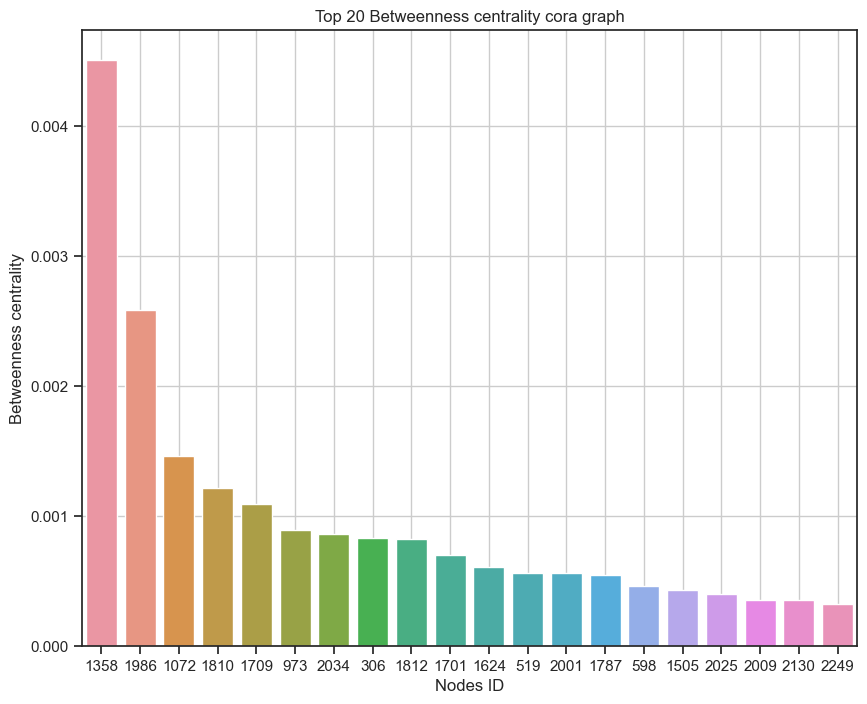

In [20]:
bet_cora_graph = dict(sorted(bet_cora_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(bet_cora_graph.keys())[:20]))
values = list(bet_cora_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Betweenness centrality')
plt.title('Top 20 Betweenness centrality cora graph')
plt.grid()
plt.show()

# Closeness Centrality

## GNN_cora

In [21]:
#questa centralità interpreta i pesi come distanza
GNN_closeness = nx.closeness_centrality(GNN_dist, distance = 'weight')

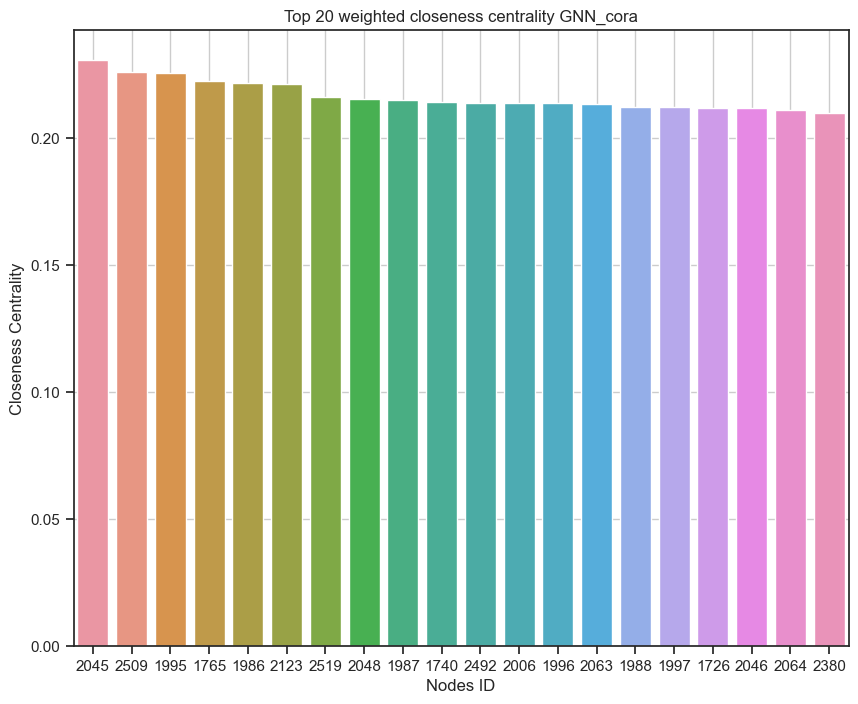

In [22]:
GNN_closeness = dict(sorted(GNN_closeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_closeness.keys())[:20]))
values = list(GNN_closeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness Centrality')
plt.title('Top 20 weighted closeness centrality GNN_cora')
plt.grid()
plt.show()

## cora

In [23]:
closeness_cora_graph = nx.closeness_centrality(cora_graph)

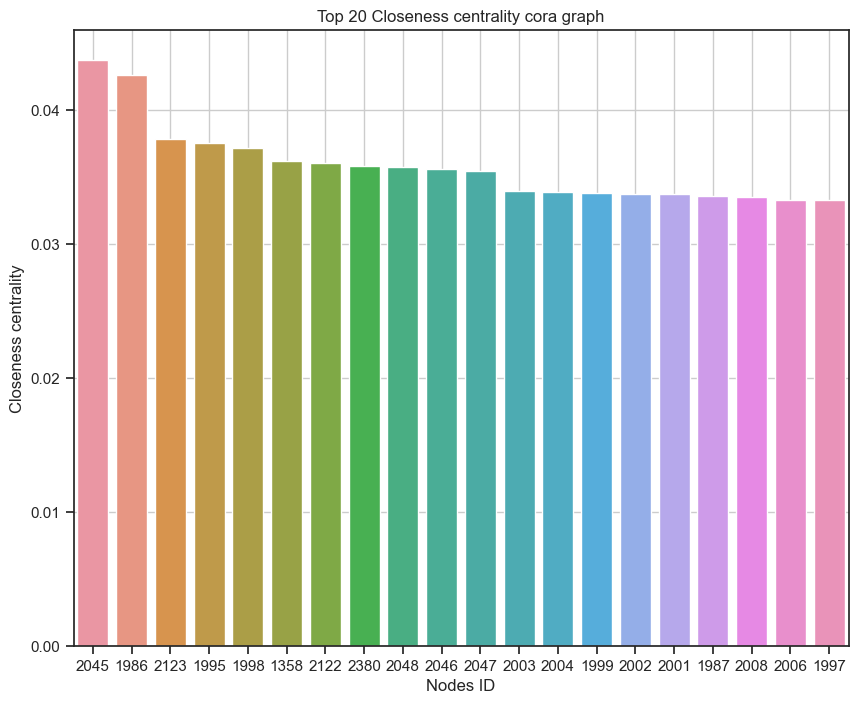

In [24]:
closeness_cora_graph = dict(sorted(closeness_cora_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(closeness_cora_graph.keys())[:20]))
values = list(closeness_cora_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness centrality')
plt.title('Top 20 Closeness centrality cora graph')
plt.grid()
plt.show()

# Eigenvectror Centrality

## GNN_cora

In [25]:
GNN_eigenvector = nx.eigenvector_centrality(GNN_sim, weight = 'weight', max_iter = 1000)

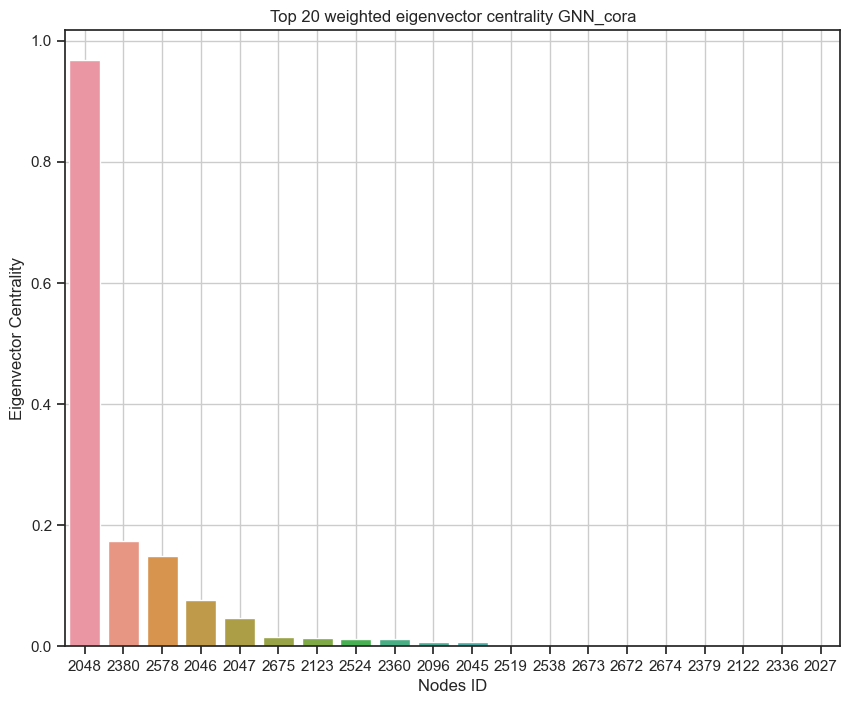

In [26]:
GNN_eigenvector = dict(sorted(GNN_eigenvector.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_eigenvector.keys())[:20]))
values = list(GNN_eigenvector.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Eigenvector Centrality')
plt.title('Top 20 weighted eigenvector centrality GNN_cora')
plt.grid()
plt.show()

## cora graph

In [27]:
eigen_cora_graph = nx.eigenvector_centrality(cora_graph, max_iter = 1000)

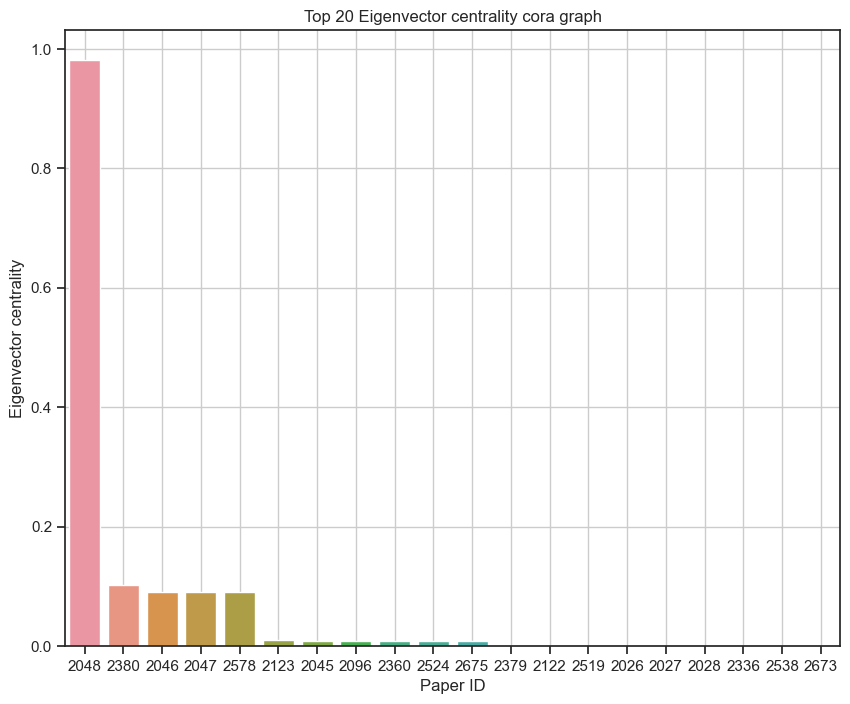

In [28]:
eigen_cora_graph = dict(sorted(eigen_cora_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(eigen_cora_graph.keys())[:20]))
values = list(eigen_cora_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Paper ID')
plt.ylabel('Eigenvector centrality')
plt.title('Top 20 Eigenvector centrality cora graph')
plt.grid()
plt.show()

# Efficiency

In [29]:
# Calculate the weighted global efficiency
def weighted_global_efficiency(G):
  weighted_efficiency = 0
  for node in G.nodes():
      shortest_paths = nx.shortest_path_length(G, source=node, weight='weight')
      efficiency = sum([1.0 / d for d in shortest_paths.values() if d > 0])
      weighted_efficiency += efficiency

  weighted_efficiency /= (len(G) * (len(G) - 1))
  return round(weighted_efficiency, 3)

In [30]:
#efficiency sulla rete vista dalla GNN
weighted_global_efficiency(GNN_dist)

0.051

In [31]:
weighted_global_efficiency(cora_graph)

0.004

## Modularity

In [32]:

def weighted_modularty(G):
  # Compute the partition of the graph using the Louvain method
  partition = greedy_modularity_communities(G, weight='weight')

  # Compute the modularity of the partition using the Louvain method
  modularity = nx.algorithms.community.quality.modularity(G, partition, weight='weight')
  return round(modularity, 3)

In [33]:
print(weighted_modularty(GNN_sim))

0.825


In [34]:
print(weighted_modularty(cora_graph))

0.807


# Community

In [35]:
#define Jaccard Similarity function
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

comm_GNN = greedy_modularity_communities(GNN_sim, weight='weight')
comm_cora = greedy_modularity_communities(cora_graph)

In [36]:
print(len(comm_GNN))
print(len(comm_cora))

108
109


In [37]:
for c in range(len(comm_cora)):
    print(len(comm_GNN[c]),len(comm_cora[c]),jaccard(comm_GNN[c], comm_cora[c]))

396 367 0.8839506172839506
316 286 0.0
256 229 0.008316008316008316
232 222 0.0
195 216 0.009828009828009828
185 197 0.8725490196078431
106 154 0.023622047244094488
97 110 0.0
92 92 0.0
87 87 0.005780346820809248
76 84 0.9047619047619048
69 82 0.006666666666666667
45 55 0.0
41 55 0.0
41 29 0.0
37 29 0.0
29 27 0.0
28 26 0.0
26 26 0.0
26 25 0.0
24 14 0.0
21 13 0.0
14 13 0.0
13 12 0.0
13 9 0.0
9 9 1.0
9 9 1.0
8 8 1.0
8 8 0.0
8 8 0.0
6 8 0.0
6 6 1.0
6 6 0.0
5 5 1.0
5 5 0.0
5 5 0.0
5 5 0.0
4 4 1.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
3 4 0.0
3 3 0.0
3 3 0.0
3 3 0.0
3 3 0.0
3 3 0.0
3 3 0.0
2 3 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.0
2 2 0.

IndexError: list index out of range

In [ ]:
for com in comm_GNN:
    print(len(com))

396
316
256
232
195
185
106
97
92
87
76
69
45
41
41
37
29
28
26
26
24
21
14
13
13
9
9
8
8
8
6
6
6
5
5
5
5
4
4
4
4
4
4
4
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [ ]:
for com in comm_cora:
    print(len(com))

367
286
229
222
216
197
154
110
92
87
84
82
55
55
29
29
27
26
26
25
14
13
13
12
9
9
9
8
8
8
8
6
6
5
5
5
5
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [ ]:
labels = df_nodes['label'].unique()
mapping = {}
for i in range(len(df_nodes)):
  mapping[i] = df_nodes.loc[i]['label']

In [ ]:
def gini_index(cluster, labels):
    """
    Calculates the Gini Index for a given cluster of objects and 7 labels.

    Parameters:
        cluster (list): A list of objects in the cluster.
        labels (list): A list of 7 labels.

    Returns:
        float: The Gini Index for the given cluster and labels.
    """
    total_count = len(cluster)
    if total_count == 0:
        return 0.0

    gini_sum = 0.0
    for label in labels:
        label_count = sum([1 for obj in cluster if mapping[obj] == label])
        label_freq = label_count / total_count
        gini_sum += label_freq ** 2

    gini_index = 1.0 - gini_sum  
    return round(gini_index, 3)

In [ ]:
import scipy

gini_GNN = [gini_index(i,labels) for i in comm_GNN]
gini_cora = [gini_index(i,labels) for i in comm_cora]
#scipy.stats.wilcoxon(gini_GNN, gini_cora)

In [ ]:
print('mannwhitneyu',scipy.stats.mannwhitneyu(gini_GNN, gini_cora))

mannwhitneyu MannwhitneyuResult(statistic=5898.0, pvalue=0.9745281824559296)


In [ ]:
df_nodes['label'].unique()

array([3, 4, 0, 2, 1, 5, 6], dtype=int64)

<AxesSubplot:>

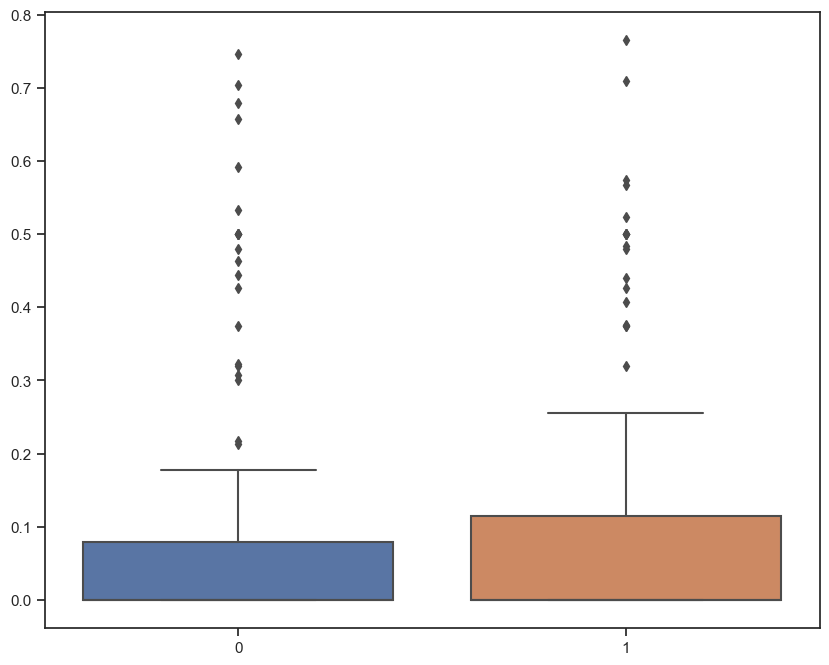

In [ ]:
import numpy as np
import seaborn as sns

all_arr = [gini_GNN, gini_cora]

sns.boxplot(data=all_arr, )

In [ ]:
gini=0
clusters = comm_GNN
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.099

In [ ]:
gini=0
clusters = comm_cora
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.097

In [ ]:
#out degree
x1 = list(GNN_dist_out_degree.keys())[:100]
x2 = list(cora_out_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: -0.0024242424242424247
p_value 0.9714917475429821
Jaccard Index: 0.3698630136986301
[306, 88, 1358, 1013, 1072, 1131, 109, 118, 1224, 1701, 645, 436, 415, 1986, 733, 1309, 598, 95, 490, 1810, 239, 1441, 748, 55, 429, 973, 1070, 548, 1655, 519, 454, 702, 94, 102, 836, 661, 1015, 2034, 30, 191, 505, 1042, 1623, 210, 437, 695, 441, 873, 651, 465, 482, 231, 711, 69, 644, 2001, 1377, 1914, 218, 417, 279, 603, 809, 989, 1203, 1920, 350, 20, 277, 1121, 1725, 481, 1692, 1119, 756, 1351, 897, 266, 1927, 1624, 577, 1065, 1399, 524, 868, 767, 4, 1171, 831, 2025, 401, 344, 510, 1526, 203, 687, 1336, 1709, 236, 1204]
[1358, 306, 88, 109, 1701, 1013, 1986, 598, 733, 95, 118, 1224, 1072, 415, 1623, 1042, 310, 436, 1810, 661, 1131, 429, 963, 507, 55, 239, 73, 154, 645, 1015, 1441, 1103, 2001, 94, 687, 218, 350, 1229, 1119, 59, 65, 89, 734, 1169, 1542, 577, 748, 657, 505, 2034, 279, 33, 48, 1309, 74, 1624, 487, 454, 525, 316, 364, 1050, 1257, 490, 702, 1416, 1703, 36, 210, 1628, 456, 736, 102, 133

In [ ]:
#in degree
x1 = list(GNN_dist_in_degree.keys())[:100]
x2 = list(cora_in_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.05373737373737375
p_value 0.4282562733304639
Jaccard Index: 0.3698630136986301
[1358, 1986, 2034, 1701, 1810, 2045, 1072, 973, 1623, 2155, 1013, 1869, 1914, 2309, 1973, 2025, 1583, 1912, 1776, 1894, 1907, 2394, 1725, 2282, 1131, 2385, 1224, 1441, 2291, 1483, 2071, 1527, 2388, 1732, 1542, 1785, 2405, 1957, 1416, 1909, 1908, 2359, 1998, 733, 1797, 2451, 1842, 1505, 2326, 2436, 1799, 498, 1882, 1413, 2130, 711, 2472, 1677, 1741, 2094, 598, 1444, 2001, 2356, 2080, 2228, 1344, 1309, 1839, 885, 2227, 1759, 2367, 1837, 2160, 519, 2018, 1624, 2112, 1871, 2078, 573, 1927, 1065, 2450, 1616, 1681, 2186, 2059, 2485, 1729, 554, 1851, 1789, 2189, 2304, 2122, 2274, 1692, 1898]
[1358, 1701, 1986, 2034, 1810, 2045, 1914, 1623, 1542, 1765, 2182, 1483, 1950, 2155, 2394, 1169, 2248, 1072, 598, 1973, 1441, 1413, 2450, 1966, 306, 973, 1692, 1894, 2130, 2464, 1416, 2367, 1013, 2080, 1927, 2451, 2359, 2383, 2671, 1703, 2238, 1725, 1628, 2122, 1776, 2025, 1742, 1869, 1740, 2083, 2176, 733, 2054, 2199, 1

In [ ]:
#betweennes
x1 = list(GNN_betweeness.keys())[:100]
x2 = list(bet_cora_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: -0.03555555555555556
p_value 0.6001752195015636
Jaccard Index: 0.7857142857142857
[1358, 1986, 1072, 1810, 1709, 973, 2034, 306, 1701, 1624, 519, 1787, 1873, 598, 1820, 2001, 1505, 2025, 2130, 1812, 2009, 2249, 1859, 1131, 836, 1914, 1013, 1224, 1070, 935, 671, 728, 441, 2045, 1623, 2671, 644, 733, 985, 2040, 1229, 1703, 1721, 1740, 1103, 1742, 1894, 1038, 1739, 1483, 1776, 231, 1920, 1927, 1725, 1416, 2026, 387, 1169, 1849, 2027, 2335, 1499, 869, 454, 1968, 1929, 1987, 1299, 1996, 581, 760, 1196, 1042, 2003, 596, 1655, 661, 1542, 1902, 139, 854, 876, 1728, 1154, 1723, 1599, 109, 1149, 1749, 1708, 1062, 2123, 963, 567, 1903, 1441, 1926, 1616, 1923]
[1358, 1986, 1072, 1810, 1709, 973, 2034, 306, 1812, 1701, 1624, 519, 2001, 1787, 598, 1505, 2025, 2009, 2130, 2249, 836, 1131, 1013, 1914, 1224, 1070, 935, 441, 728, 454, 2045, 2671, 1623, 644, 733, 2040, 985, 1894, 1725, 1229, 1703, 1740, 1873, 671, 1776, 1920, 231, 1416, 1927, 387, 1169, 2026, 1038, 2027, 687, 2335, 1742, 1929, 1483,

In [ ]:
#closeness
x1 = list(GNN_closeness.keys())[:20]
x2 = list(closeness_cora_graph.keys())[:20]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )
print(x1)
print(x2)

tau: 0.06315789473684211
p_value 0.7246362205272814
Jaccard Index: 0.3333333333333333
[2045, 2509, 1995, 1765, 1986, 2123, 2519, 2048, 1987, 1740, 2492, 2006, 1996, 2063, 1988, 1997, 1726, 2046, 2064, 2380]
[2045, 1986, 2123, 1995, 1998, 1358, 2122, 2380, 2048, 2046, 2047, 2003, 2004, 1999, 2002, 2001, 1987, 2008, 2006, 1997]


In [ ]:
#eigenvector

x1 = list(GNN_eigenvector.keys())[:100]
x2 = list(eigen_cora_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)

print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.2080808080808081
p_value 0.002158861416020849
Jaccard Index: 0.9047619047619048
[2048, 2380, 2578, 2046, 2047, 2675, 2123, 2524, 2360, 2096, 2045, 2519, 2538, 2673, 2672, 2674, 2379, 2122, 2336, 2027, 2028, 2026, 2685, 2004, 2064, 2063, 2477, 2509, 2412, 2301, 2405, 2637, 2518, 2671, 2326, 2002, 2325, 2025, 2121, 2378, 2335, 2003, 2044, 2381, 2348, 2364, 2328, 2452, 1996, 1988, 2006, 1997, 1987, 1992, 2000, 2007, 2008, 1995, 2005, 1993, 1994, 1999, 2009, 1990, 1980, 2375, 2552, 1998, 1989, 2120, 2649, 2110, 2178, 2249, 2042, 2458, 1991, 2001, 2051, 2189, 2052, 2327, 1798, 2451, 2491, 2118, 2292, 1950, 1986, 2306, 2270, 1979, 2281, 2035, 2038, 2040, 2130, 2041, 2039, 2457]
[2048, 2380, 2046, 2047, 2578, 2123, 2045, 2096, 2360, 2524, 2675, 2379, 2122, 2519, 2026, 2027, 2028, 2336, 2538, 2673, 2674, 2672, 2685, 2004, 2003, 2002, 2326, 2325, 2509, 2025, 2335, 2348, 2301, 2063, 2412, 2477, 2381, 2121, 2064, 2044, 2378, 2518, 2671, 2637, 2364, 2405, 2452, 1998, 1995, 1987, 1999, 2009,